In [1]:
import matplotlib.pyplot as plt
from expdespy.datasets.dic_milho import load_dic_milho
from expdespy.datasets.dbc_caprinos import load_dbc_caprinos
from expdespy.models import DIC, DBC
from expdespy.utils import get_summary
from expdespy.posthoc import TukeyHSD, PairwiseTTest


# DIC (Delineamento Interamente ao Acaso)

## Load the data

In [2]:
print("### Exemplo DIC - Milho ###")

df_dic, desc_dic = load_dic_milho()
print("Descrição do dataset DIC:")
print(desc_dic)

### Exemplo DIC - Milho ###
Descrição do dataset DIC:
Experimento com 4 variedades de milho (A, B, C, D) distribuídas aleatoriamente em 20 parcelas (5 por variedade). A variável resposta é a produtividade em sacas por hectare. Usado para análise com DIC e testes de comparação múltipla.


In [3]:
df_dic

,variedade,produtividade
0,A,25
1,A,26
2,A,20
3,A,23
4,A,21
5,B,31
6,B,25
7,B,28
8,B,27
9,B,24


In [4]:
get_summary(df_dic)

,clumn_dtype,na,na_pct,top_class,top_class_pct,nunique,unique_values
variedade,object,0,0.0,A,25.0,4,"[A, B, C, D]"
produtividade,int64,0,0.0,25,15.0,13,...


In [5]:
# Instanciar modelo
dic_model = DIC(data=df_dic, response="produtividade", treatment="variedade")

# ANOVA
anova_result = dic_model.anova()
print("\nTabela ANOVA DIC:")
print(anova_result)


Tabela ANOVA DIC:
              sum_sq    df         F    PR(>F) Signif
C(variedade)  163.75   3.0  7.797619  0.001976     **
Residual      112.00  16.0       NaN       NaN       


In [6]:
# Verificar pressupostos
alpha = 0.05
assumptions = dic_model.check_assumptions(alpha=alpha)
print("\nPressupostos ANOVA:")
for test in assumptions:
    test_name = test
    p_value = assumptions.get(test_name).get("p-value")
    h0 = assumptions.get(test_name).get("H0")
    print(f"{test_name}: H0: {h0}")
    if p_value < alpha:
        print(f"p-value: {p_value} < {alpha} => Rejeitar H0")
    else:
        print(f"p-value: {p_value} > {alpha} => Não rejeitar H0")
    
    



            Normality (Shapiro-Wilk):
                - H0: The residuals are normally distributed
                - H1: The residuals are not normally distributed
            - p-value: 0.23587357658663996
            Conclusion: H0 must not be rejected
            Homoscedasticity (Levene):
                - H0: The variances of the groups are equal
                - H1: The variances of the groups are not equal
            - p-value: 1.0
            Conclusion: H0 must not be rejected
            

Pressupostos ANOVA:
normality (Shapiro-Wilk): H0: The residuals are normally distributed
p-value: 0.23587357658663996 > 0.05 => Não rejeitar H0
homoscedasticity (Levene): H0: The variances of the groups are equal
p-value: 1.0 > 0.05 => Não rejeitar H0


## Post Hoc Analysis - Teste de Tukey

In [7]:
values_column = 'produtividade'
trats_column = 'variedade'


tukey_hsd = TukeyHSD(
    data=df_dic,
    values_column=values_column,
    trats_column=trats_column,
    alpha = 0.05
)
tukey_hsd.run()

,group1,group2,meandiff,p-adj,lower,upper,reject
0,A,B,4.0,0.1192,-0.7874,8.7874,False
1,A,C,3.0,0.3123,-1.7874,7.7874,False
2,A,D,8.0,0.0011,3.2126,12.7874,True
3,B,C,-1.0,0.9313,-5.7874,3.7874,False
4,B,D,4.0,0.1192,-0.7874,8.7874,False
5,C,D,5.0,0.0391,0.2126,9.7874,True


In [8]:
tukey_hsd.run_compact_letters_display()

,variedade,Mean,Letters
3,D,31.0,a
1,B,27.0,ab
2,C,26.0,b
0,A,23.0,b


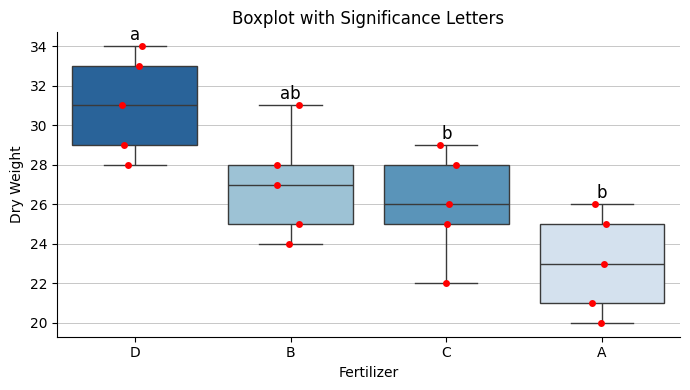

In [9]:
# Criar o gráfico
fig, ax = plt.subplots(figsize=(7, 4))
tukey_hsd.plot_compact_letters_display(ax=ax)
# Layout
plt.xlabel("Fertilizer")
plt.ylabel("Dry Weight")
plt.title("Boxplot with Significance Letters")


plt.tight_layout()
plt.show()

## Post Hoc Analysis - Teste de T

In [12]:
t_test = PairwiseTTest(
    data=df_dic,
    values_column=values_column,
    trats_column=trats_column,
    alpha = 0.05,
    equal_var = True  # Assume variâncias iguais (padrão como no ANOVA
)

t_test.run_compact_letters_display()

,variedade,Mean,Letters
3,D,31.0,a
1,B,27.0,b
2,C,26.0,bc
0,A,23.0,c


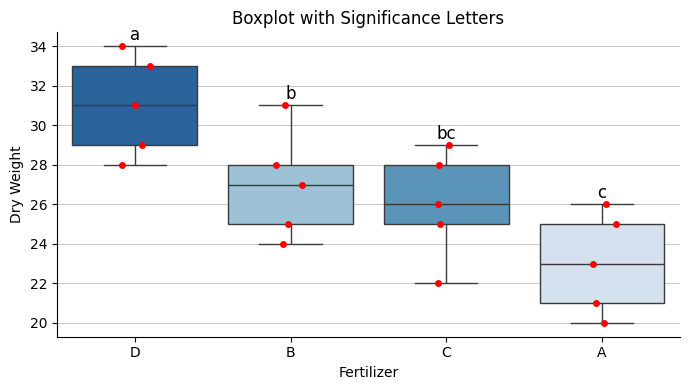

In [ ]:

# Criar o gráfico
fig, ax = plt.subplots(figsize=(7, 4))
t_test.plot_compact_letters_display(ax=ax)
# Layout
plt.xlabel("Fertilizer")
plt.ylabel("Dry Weight")
plt.title("Boxplot with Significance Letters")


plt.tight_layout()
plt.show()